In [4]:
!python3 -m pip install --user git-filter-repo

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import requests

# Overpass API endpoint
overpass_url = "http://overpass-api.de/api/interpreter"

# Overpass API query to get highways in California (OSM data)
overpass_query = """
[out:json];
way
  ["highway"]
  (34.0,-124.5,42.0,-114.0);  // Bounding box for California
out body;
>;
out skel qt;
"""

# Send the request to the Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})

# Check if the request was successful
if response.status_code == 200:
    # Save the response as a GeoJSON file
    with open("california_highways.geojson", "w") as f:
        f.write(response.text)
    print("GeoJSON file 'california_highways.geojson' saved successfully.")
else:
    print("Error fetching data from Overpass API:", response.status_code)

UnicodeEncodeError: 'charmap' codec can't encode characters in position 234284-234290: character maps to <undefined>

In [2]:
import requests

# Overpass API endpoint
overpass_url = "http://overpass-api.de/api/interpreter"

# Overpass API query to get highways in California (OSM data)
overpass_query = """
[out:json];
way
  ["highway"]
  (34.0,-124.5,42.0,-114.0);  // Bounding box for California
out body;
>;
out skel qt;
"""

# Send the request to the Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})

# Check if the request was successful
if response.status_code == 200:
    # Save the response as a GeoJSON file with proper encoding
    with open("california_highways.geojson", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("GeoJSON file 'california_highways.geojson' saved successfully.")
else:
    print("Error fetching data from Overpass API:", response.status_code)

GeoJSON file 'california_highways.geojson' saved successfully.


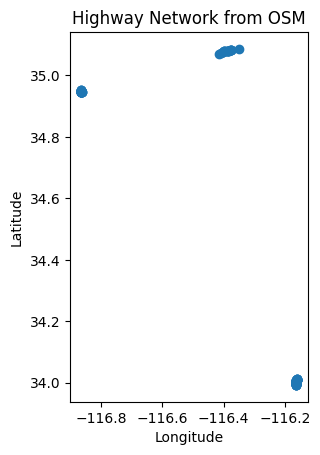

In [8]:
import osmapi
import geopandas as gpd
import matplotlib.pyplot as plt

# Initialize the OSM API
api = osmapi.OsmApi()

# Example way id from the dataset (replace with your actual IDs)
way_ids = [2022, 2026, 2031, 2044]  # List of way ids

# Retrieve the way information from OSM
ways = []
for way_id in way_ids:
    way = api.WayGet(way_id)  # Get way information from OSM
    ways.append(way)

# Extract the nodes and get their coordinates
nodes_coords = []
for way in ways:
    for node_id in way['nd']:
        node = api.NodeGet(node_id)  # Get node info
        lat = node['lat']
        lon = node['lon']
        nodes_coords.append((lat, lon))

# Convert the list of coordinates to a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([lon for lat, lon in nodes_coords], [lat for lat, lon in nodes_coords]))

# Plot the nodes on a map
gdf.plot()
plt.title("Highway Network from OSM")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [10]:
import folium

# Create a map centered around California (replace with coordinates of your choice)
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add markers for each node's coordinates
for lat, lon in nodes_coords:
    folium.Marker([lat, lon]).add_to(california_map)

# Save the map to an HTML file
california_map.save('california_highways_map.html')

In [11]:
import osmapi
import random
import os
import folium

# Initialize OSM API
api = osmapi.OsmApi()

# Example way IDs (replace with your actual IDs or fetch them from your data)
way_ids = [2022, 2026, 2031, 2044]  # List of way ids

# Fetch way data from OpenStreetMap and extract node coordinates
nodes_coords = []
for way_id in way_ids:
    way = api.WayGet(way_id)  # Get way data from OSM
    for node_id in way['nd']:
        node = api.NodeGet(node_id)  # Get node info
        lat = node['lat']
        lon = node['lon']
        nodes_coords.append((lat, lon))

# Now nodes_coords contains a list of (lat, lon) coordinates from the highways

# Step 1: Get the images from the folder 'train/images/'
image_folder = 'train/images/'
image_files = os.listdir(image_folder)

# Step 2: Map each image to a random coordinate
image_coords = []

# Randomly assign coordinates from the nodes_coords list to each image
for image_file in image_files:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        # Randomly pick a coordinate from the highway nodes
        random_coord = random.choice(nodes_coords)
        image_coords.append((random_coord[0], random_coord[1], image_file))

# Step 3: Create a map to visualize the results
map_center = [36.7783, -119.4179]  # California's center (can adjust if needed)
california_map = folium.Map(location=map_center, zoom_start=6)

# Add image markers to the map
for lat, lon, image in image_coords:
    # Add a marker with a popup displaying the image
    folium.Marker(
        [lat, lon],
        popup=f'<img src="{image_folder}/{image}" width="100" height="100">'
    ).add_to(california_map)

# Save the map to an HTML file
california_map.save('mapped_uav_images.html')
print("Map has been saved as 'mapped_uav_images.html'")

Map has been saved as 'mapped_uav_images.html'


In [3]:
import osmapi
import random
import os
import folium
import requests
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# Initialize OSM API
api = osmapi.OsmApi()

# Step 1: Identify Major Highways (Motorways and Primary Roads)

# Use Overpass API or OSM to get major highways in California
# The query will get roads that are either motorways or primary roads in California

# Define Overpass query for California's national highways (motorways, primary roads)
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
way["highway"="motorway"](37.0,-120.0,37.5,-119.5);  // Filter by California's bounding box
way["highway"="primary"](37.0,-120.0,37.5,-119.5);
out body;
"""

response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# Extract the coordinates of the highways
highway_coords = []
for element in data['elements']:
    if element['type'] == 'way':
        # Extract coordinates of the way
        for node_id in element['nodes']:
            node = api.NodeGet(node_id)  # Get node info
            lat = node['lat']
            lon = node['lon']
            highway_coords.append((lat, lon))

# Step 2: Get images from the 'train/images/' folder
image_folder = 'train/images/'
image_files = os.listdir(image_folder)

# Step 3: Map each image to a random coordinate along the major highways
image_coords = []

# Randomly assign coordinates from the highway nodes list to each image
for image_file in image_files:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        # Randomly pick a coordinate from the major highway coordinates
        random_coord = random.choice(highway_coords)
        image_coords.append((random_coord[0], random_coord[1], image_file))

# Step 4: Visualize the results on a map with folium
map_center = [36.7783, -119.4179]  # California's center (adjust if needed)
california_map = folium.Map(location=map_center, zoom_start=6)

# Add image markers to the map
for lat, lon, image in image_coords:
    # Add a marker with a popup displaying the image
    folium.Marker(
        [lat, lon],
        popup=f'<img src="{image_folder}/{image}" width="100" height="100">'
    ).add_to(california_map)

# Save the map to an HTML file
california_map.save('mapped_uav_images_national_highways.html')
print("Map has been saved as 'mapped_uav_images_national_highways.html'")

ModuleNotFoundError: No module named 'osmapi'

In [18]:
import osmapi
import random
import os
import folium
import requests
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# Initialize OSM API
api = osmapi.OsmApi()

# Step 1: Identify Major Highways (Motorways and Primary Roads)

# Use Overpass API or OSM to get major highways in California
# The query will get roads that are either motorways or primary roads in California

# Define Overpass query for California's national highways (motorways, primary roads)
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
way["highway"="motorway"](33.5,-118.0,37.0,-120.0);  // Filter by California's broader bounding box
way["highway"="primary"](33.5,-118.0,37.0,-120.0);
way["highway"="secondary"](33.5,-118.0,37.0,-120.0);  // Including secondary highways
out body;
"""

response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# Debug: Check if the response contains elements
if 'elements' not in data or len(data['elements']) == 0:
    print("No elements found in the Overpass query response.")
else:
    print(f"Found {len(data['elements'])} elements.")

# Extract the coordinates of the highways
highway_coords = []
for element in data['elements']:
    if element['type'] == 'way':
        # Extract coordinates of the way
        for node_id in element['nodes']:
            node = api.NodeGet(node_id)  # Get node info
            lat = node['lat']
            lon = node['lon']
            highway_coords.append((lat, lon))

# Debug: Check the number of coordinates extracted
if len(highway_coords) == 0:
    print("No coordinates were extracted from the Overpass query.")
else:
    print(f"Extracted {len(highway_coords)} coordinates.")

# Step 2: Get images from the 'train/images/' folder
image_folder = 'train/images/'
image_files = os.listdir(image_folder)

# Step 3: Map each image to a random coordinate along the major highways
image_coords = []

# Check if there are any coordinates before trying to assign them to images
if len(highway_coords) > 0:
    for image_file in image_files:
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            # Ensure that each image gets placed along different highway coordinates
            random_coord = random.choice(highway_coords)
            image_coords.append((random_coord[0], random_coord[1], image_file))
else:
    print("No highway coordinates available. Skipping image plotting.")

# Step 4: Visualize the results on a map with folium
if len(image_coords) > 0:
    map_center = [36.7783, -119.4179]  # California's center (adjust if needed)
    california_map = folium.Map(location=map_center, zoom_start=6)

    # Add image markers to the map
    for lat, lon, image in image_coords:
        # Add a marker with a popup displaying the image
        folium.Marker(
            [lat, lon],
            popup=f'<img src="{image_folder}/{image}" width="100" height="100">'
        ).add_to(california_map)

    # Save the map to an HTML file
    california_map.save('mapped_uav_images_national_highways.html')
    print("Map has been saved as 'mapped_uav_images_national_highways.html'")
else:
    print("No images were plotted due to lack of valid coordinates.")

No elements found in the Overpass query response.
No coordinates were extracted from the Overpass query.
No highway coordinates available. Skipping image plotting.
No images were plotted due to lack of valid coordinates.


In [16]:
import requests
import random
import os
import folium

# Function to get route coordinates using OSRM (Open Source Routing Machine)
def get_route_coordinates(start, end):
    # OSRM API endpoint to get route between two points
    osrm_url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full"
    response = requests.get(osrm_url)

    # Debugging: check the response content type and raw text
    print("Response Content-Type:", response.headers.get('Content-Type'))
    print("Raw response text:", response.text)  # Print the raw string returned by the API

    # Try to parse the response as JSON
    try:
        data = response.json()  # Attempt to parse JSON from the response
    except ValueError as e:
        print(f"Error: Response is not valid JSON. {e}")
        return []

    # If the status code is not 200, print the response status code and body for debugging
    if response.status_code != 200:
        print(f"Error: Received status code {response.status_code}. Response body: {response.text}")
        return []

    # Check if the data contains the 'routes' key and extract route coordinates
    if 'routes' in data:
        route = data['routes'][0]['geometry']['coordinates']
        return [(lat, lon) for lon, lat in route]  # Flip the coordinates to (lat, lon)
    else:
        print("Error: 'routes' key not found in response data:", data)
        return []

# List of major cities (e.g., San Jose, Los Angeles, etc.)
cities = {
    "San Jose": (37.7749, -122.4194),  # San Jose coordinates (latitude, longitude)
    "Los Angeles": (34.0522, -118.2437),  # Los Angeles coordinates
    # Add other cities if needed
}

# Step 1: Get the coordinates for the route from San Jose to Los Angeles
san_jose = cities["San Jose"]
los_angeles = cities["Los Angeles"]

route_coordinates = get_route_coordinates(san_jose, los_angeles)

# Step 2: Get images from the 'train/images/' folder
image_folder = 'train/images/'
image_files = os.listdir(image_folder)

# Step 3: Map each image to a coordinate along the route
image_coords = []

# Randomly assign coordinates from the route to each image
for image_file in image_files:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        # Randomly pick a coordinate along the route (from San Jose to LA)
        random_coord = random.choice(route_coordinates)
        image_coords.append((random_coord[0], random_coord[1], image_file))

# Step 4: Visualize the results on a map with folium
map_center = [(san_jose[0] + los_angeles[0]) / 2, (san_jose[1] + los_angeles[1]) / 2]  # Map center between San Jose and LA
california_map = folium.Map(location=map_center, zoom_start=6)

# Plot the route (for visual reference)
folium.PolyLine(route_coordinates, color="blue", weight=3, opacity=0.6).add_to(california_map)

# Add image markers to the map
for lat, lon, image in image_coords:
    # Add a marker with a popup displaying the image
    folium.Marker(
        [lat, lon],
        popup=f'<img src="{image_folder}/{image}" width="100" height="100">'
    ).add_to(california_map)

# Save the map to an HTML file
california_map.save('mapped_images_san_jose_to_la.html')
print("Map has been saved as 'mapped_images_san_jose_to_la.html'")

Response Content-Type: application/json; charset=UTF-8
Raw response text: {"code":"Ok","routes":[{"geometry":"k|peFp`ejVQUMQOQMSk@w@EEIMFKDEBGNSNSFIFILQf@q@HKv@gAFIDGj@u@W_@cB}Bq@_AOSMQQU_@i@y@gAa@i@QUOUMQY_@GIU[Y_@mBkCY_@MOMSKOeAwAU[OS}@oAkBiC_@g@MQEGGIg@q@uAkB_@i@AAg@o@cAuA]e@Ya@OQKO_@g@cAuAoBmCCEMQ_@g@s@cAIIMQJS\\i@f@o@r@{@BGTWNSZa@Zc@BEDEDGHMd@m@b@m@hA}Ah@s@DEPUBGJMJODEb@m@Zc@HKRY\\c@R]^e@d@q@PQtAkBZa@BEj@w@LOj@w@X_@u@?I?w@Bu@@EAOAUESKWSm@w@m@w@cAsAgCgD}HqKs@eAyC_EqBqCeA}AY_@c@q@c@u@i@cAsCoFMWMYMUMU_@i@_@g@{@aA{eCmoCKKaDkDQS_FoF_AeA}@cA{@_Ao@q@]_@]]aAcAY]Y[SWSUQUQUQWQWQUQWQWQWc@q@MUOYOWQYOWOYOYMYOYUg@}Qc`@OYM[M[MYM[M[M]M_@K[K]M[I]K]K]I]I]I]I]I_@G_@I]G_@G]G_@G_@E_@E_@G_@C]E_@E[Ca@wFat@gFkp@IcAGaAI_AGaAG_AGaAG_AG_AGgAE}@G_AEaAEaAEaAE_AEcAE_AC}@AUSuGIkCGsBEeAEaAGaAGaAG_AG}@GaAI_Ag@aFMaBI_AK_AYuCi@mF_@uDOqA]cD]cD[eDUeCw@gIWeCI}@IaAGcAIuAEo@EaA_@mHIcBGaAGcAG_AKcAc@wDQaCCSCQ[eCO_BQ_BQaBO_BQ_BS_BK{@K}@iBsNG]E_@G]G_@I]G]K_@I]I[K]c@wAI[K_@I]I_@G_@E]E_@Ca@C_@Ca@?_@?a@?_@@a@B_@Ba@D_@D_@F_@H]F

TypeError: string indices must be integers

In [3]:
import geopandas as gpd
import random
import pandas as pd
from shapely.geometry import Point
import folium

# Function to load highway data (GeoJSON format)
def load_highway_data(geojson_path):
    """
    Load and return the highway data from a GeoJSON file.
    """
    highway_gdf = gpd.read_file(geojson_path)
    return highway_gdf

# Function to generate random points along a highway (LineString)
def generate_random_points_on_highway(road_geometry, num_points=5):
    """
    Generate random points along a given highway (LineString) geometry.
    Returns a list of (longitude, latitude) tuples.
    """
    points = []
    for _ in range(num_points):
        # Random distance along the highway (line)
        random_distance = random.uniform(0, road_geometry.length)
        # Get the point on the line at the random distance
        point = road_geometry.interpolate(random_distance)
        points.append((point.x, point.y))  # (longitude, latitude)
    return points

# Function to create the dataset with random coordinates and UAV image names
def create_image_dataset(highway_gdf, num_points_per_highway=5):
    """
    Create a dataset of UAV images mapped to random points along highways in California.
    """
    image_coordinates = []

    for idx, road in highway_gdf.iterrows():
        highway_geometry = road.geometry
        # Generate random points along the highway
        random_points = generate_random_points_on_highway(highway_geometry, num_points=num_points_per_highway)
        for point in random_points:
            # Image filename (e.g., image_1234.jpg)
            image_file = f"image_{random.randint(1000, 9999)}.jpg"
            image_coordinates.append({
                'Sequence': len(image_coordinates) + 1,
                'Image File': image_file,
                'Latitude': point[1],
                'Longitude': point[0],
                'Highway Name': road['name'] if 'name' in road else 'Unknown'
            })
    
    return pd.DataFrame(image_coordinates)

# Function to save the dataset to CSV
def save_to_csv(df, file_path):
    """
    Save the dataset to a CSV file.
    """
    df.to_csv(file_path, index=False)
    print(f"Dataset saved to {file_path}")

# Function to visualize the dataset on a map using Folium
def visualize_on_map(df, map_center=(36.7783, -119.4179), zoom_start=6, output_map_path="mapped_highways_map.html"):
    """
    Visualize the UAV images' coordinates on a map using Folium.
    """
    m = folium.Map(location=map_center, zoom_start=zoom_start)
    
    for _, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Image File']}<br>Highway: {row['Highway Name']}",
            icon=folium.Icon(color='blue')
        ).add_to(m)
    
    m.save(output_map_path)
    print(f"Map saved to {output_map_path}")

# Main Function to Generate the Dataset and Visualize it
def main():
    # Define the path to the GeoJSON file containing highway data
    geojson_path = "california_highways.geojson"  # You can download this from OpenStreetMap using Overpass API
    
    # Load the highway data
    highway_gdf = load_highway_data(geojson_path)
    
    # Create the dataset with random coordinates for UAV images
    image_dataset = create_image_dataset(highway_gdf, num_points_per_highway=5)
    
    # Save the dataset to a CSV file
    save_to_csv(image_dataset, "mapped_uav_images.csv")
    
    # Visualize the coordinates on a map using Folium
    visualize_on_map(image_dataset, output_map_path="mapped_highways_map.html")

# Execute the main function
if __name__ == "__main__":
    main()

DataSourceError: 'california_highways.geojson' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.